# Full Neural Network Implementation for MNIST Classification

In [1]:
# Device and Initial Setup

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cpu


In [2]:
# Loading and Preparing Data

from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Load MNIST dataset
data_mnist = datasets.MNIST(
    root="data",      # Folder location
    train=True,       # Training set (60,000 images)
    download=True,    
    transform=ToTensor()  # Convert to tensors
)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20136597.78it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3325071.88it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 6316274.80it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1705661.09it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



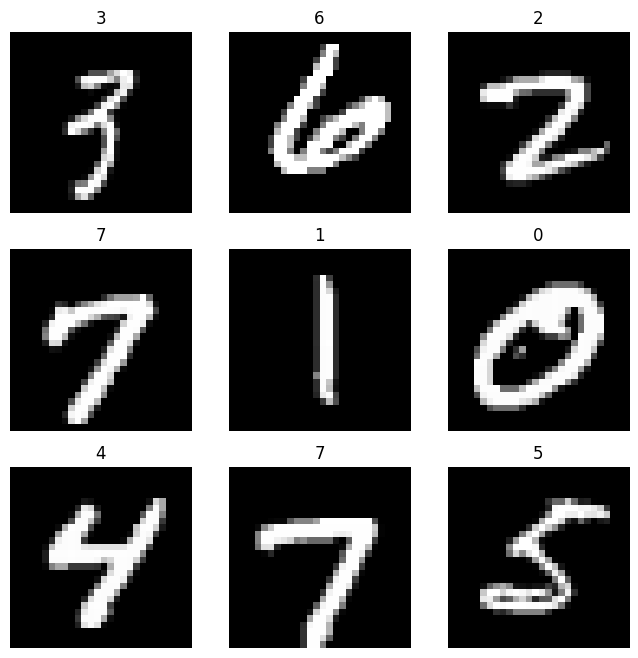

In [3]:
# Data Visualization

# Display sample images
figure = plt.figure(figsize=(8,8))
rows, columns = 3, 3

for i in range(1, columns * rows + 1):
    sample_idx = torch.randint(len(data_mnist), size=(1,)).item()
    img, label = data_mnist[sample_idx]
    figure.add_subplot(rows, columns, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()


In [4]:
# Data Splitting

# Split into train, validation, and test sets
train, val, test = torch.utils.data.random_split(
    data_mnist, [0.8, 0.1, 0.1]
)

print(f"Train size: {len(train)}")
print(f"Val size: {len(val)}")
print(f"test size: {len(test)}")


Train size: 48000
Val size: 6000
test size: 6000


In [5]:
# Neural Network Model Definition

from torch import nn

class NeuronalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(28*28, 15),  # Input layer to hidden layer
            nn.ReLU(),             # Activation function
            nn.Linear(15,10)       # Hidden layer to output
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.net(x)
        return logits


In [ ]:
# Model Initialization

model = NeuronalNetwork().to(device)
total_params = sum(p.numel() for p in model.parameters())


In [ ]:
# Single Prediction Test

img, lbl = train[200]
lbl = torch.tensor(lbl).reshape(1)
img, lbl = img.to(device), lbl.to(device)

logits = model(img)
y_pred = logits.argmax(1)

plt.imshow(img.cpu().squeeze(), cmap="gray")
print(f"Logits: {logits}")
print(f"Prediction: {y_pred[0]}")
print(f"Category: {lbl[0]}")


In [ ]:
# Loss Function and Optimizer Setup

fn_lost = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)


In [ ]:
# Training Setup

from torch.utils.data import DataLoader

BATCH_SIZE = 1000
LEARNING_RATE = 0.1
EPOCH = 10

train_loader = DataLoader(
    dataset=train,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_loader = DataLoader(
    dataset=val,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [ ]:
# Training and Validation Functions

def train_loop(dataloader, model, loss_fn, optimizer):
    train_size = len(dataloader.dataset)
    nbatch = len(dataloader)
    model.train()
    lost_train, accuracy = 0, 0

    for nlote, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        lost_train += loss.item()
        accuracy += (logits.argmax(1)==y).type(torch.float).sum().item()

def val_loop(dataloader, model, loss_fn):
    val_size = len(dataloader.dataset)
    nbatch = len(dataloader)
    model.eval()
    lost_val, accuracy = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            logits = model(X)
            lost_val += loss_fn(logits, y).item()
            accuracy += (logits.argmax(1) == y).type(torch.float).sum().item()


In [ ]:
# Training Execution

for t in range(EPOCH):
    print(f"Iteration: {t+1}/{EPOCH}\n--------------")
    train_loop(train_loader, model, fn_lost, optimizer)
    val_loop(val_loader, model, fn_lost)

print("The model was training!")


In [ ]:
# Prediction Function

def predict(model, img):
    logits = model(img)
    y_pred = logits.argmax(1).item()
    plt.imshow(img.cpu().squeeze(), cmap="gray")
    plt.title(f"Category: {y_pred}")

# Test prediction
img, lbl = test[1234]
predict(model, img)


## This implementation shows a complete neural network pipeline for MNIST digit classification, including:

- Data loading and preprocessing
- Model definition
- Training and validation loops
- Prediction functionality
- Device management (CPU/GPU)
- Visualization utilities

The code is structured to handle both training and inference phases, with proper separation of concerns and clear progression from data preparation to model evaluation.